In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from torchvision import datasets, transforms
import time
import statistics
import seaborn as sns
from pylab import savefig
import sklearn.metrics

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from numpy.random import seed
import tensorflow

In [2]:
mnist_training, mnist_testing = tf.keras.datasets.mnist.load_data()
training_data = np.float16(mnist_training[0])  # Returns np.array
training_labels = np.asarray(mnist_training[1], dtype=np.int32)
testing_data = np.float16(mnist_testing[0])  # Returns np.array
testing_labels = np.asarray(mnist_testing[1], dtype=np.int32)

training_data_flattened = training_data.reshape(len(training_data), 28*28)
testing_data_flattened = testing_data.reshape(len(testing_data), 28*28)

In [3]:
def repeatedTrainingAndTesting(model_name, dropout, batch_normalization, M):
    
    if batch_normalization and not(dropout):
        model = Sequential([
            BatchNormalization(),
            Dense(10, input_shape=(784,), activation='sigmoid'),
            Dense(10, activation='softmax'),
        ]);
        
    elif not(batch_normalization) and dropout:
        model = Sequential([
            Dropout(0.2, input_shape=(784,)),
            Dense(10, input_shape=(784,), activation='sigmoid'),
            Dense(10, activation='softmax'),
        ]);
        
    elif not(batch_normalization) and not(dropout):
        model = Sequential([
            Dense(10, input_shape=(784,), activation='sigmoid'),
            Dense(10, activation='softmax'),
        ]);
        
    elif batch_normalization and dropout:
        model = Sequential([
            BatchNormalization(),
            Dropout(0.2, input_shape=(784,)),
            Dense(10, input_shape=(784,), activation='sigmoid'),
            Dense(10, activation='softmax'),
        ]);

        
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    
    accuracies = []
    totalTime = 0
    models = []
    
    for i in range(M):
        
        totalTime = 0
        
        print('_______________________________________________________________________ M='+str(i+1))
        
        # TRAIN
        start_time = time.time()
        model.fit(training_data_flattened, training_labels, epochs=10)
        # 10 epochs seems to be good enough for this
        end_time = time.time()
        duration = end_time - start_time
        print("Training time: --- %s seconds ---" % (duration))
        totalTime += duration
        
        # TEST
        start_time = time.time()
        accuracy_score = model.evaluate(testing_data_flattened, testing_labels)[1]
        duration = end_time - start_time
        print("Testing Accuracy: {0:f}%\n".format(accuracy_score*100))
        accuracies.append(accuracy_score)
        
        models.append(model)
        
    #print(accuracies)
        
    max_value = max(accuracies)
    max_index = accuracies.index(max_value)
        
    return (totalTime, models[max_index])

In [4]:
def chooseNumber(predictions):
    
    tensors = []
    
    for myPrediction in predictions:
    
        myPrediction = myPrediction.tolist()

        temp = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

        max_value = max(myPrediction)
        max_index = myPrediction.index(max_value)

        temp[max_index] = 1.0

        numpy_array = np.array(temp)
        tensor1 = tf.convert_to_tensor(numpy_array)
        
        tensors.append(tensor1)
        
    numpy_array = np.array(tensors)
    returnTensor = tf.convert_to_tensor(numpy_array)
        
    return returnTensor

In [5]:
def evaluate(bestModel, fileName):
    
    testing_pred = bestModel.predict(testing_data_flattened)
    testing_pred_choosen = chooseNumber(testing_pred)
    Y_pred_classes = np.argmax(testing_pred_choosen, axis = 1) 
    
    testing_labels_oneHot = tf.one_hot(testing_labels.astype(np.int32), depth=10)
    Y_true = np.argmax(testing_labels_oneHot, axis = 1)
    
    confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)
    
    f1 = sklearn.metrics.f1_score(Y_true, Y_pred_classes, average='weighted')
    accuracy = sklearn.metrics.accuracy_score(Y_true, Y_pred_classes)

    plt.figure(figsize=(10, 8))
    svm = sns.heatmap(confusion_mtx, annot=True, fmt='g')
    figure = svm.get_figure()   
    figure.savefig(fileName)
    
    return (f1, accuracy)

# MLP

In [6]:
m = 50

## With Dropout, With Batch-Normalization

_______________________________________________________________________ M=1
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3303 - accuracy: 0.6568
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5612 - accuracy: 0.8558
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4513 - accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4127 - accuracy: 0.8828
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3811 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8924
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8903
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3545 - accuracy: 0.8959
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3544 - accuracy: 0.8942
Epoch 

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2693 - accuracy: 0.9178
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9209
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2708 - accuracy: 0.9185
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9207
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.9198
Training time: --- 32.62721109390259 seconds ---
313/313 [==============================] - 0s 969us/step - loss: 0.2491 - accuracy: 0.9337
Testing Accuracy: 93.370003%

_______________________________________________________________________ M=8
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2701 - accuracy: 0.9188
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.9200
Epoch 3/10
1875/1875 [============================

313/313 [==============================] - 0s 988us/step - loss: 0.2410 - accuracy: 0.9366
Testing Accuracy: 93.660003%

_______________________________________________________________________ M=14
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2505 - accuracy: 0.9252
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2503 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2514 - accuracy: 0.9256
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9249
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2470 - acc

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2428 - accuracy: 0.9268
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2417 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2437 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2412 - accuracy: 0.9266
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2426 - accuracy: 0.9272
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2429 - accuracy: 0.9266
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2425 - accuracy: 0.9270
Training time: --- 31.76505470275879 seconds ---
313/313 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 0.9381
Testing Accuracy: 93.809998%

_______________________________________________________________________ M=21
Epoch 1/10
1875/1875 [=============================

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2381 - accuracy: 0.9289
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2390 - accuracy: 0.9273
Training time: --- 31.88014578819275 seconds ---
313/313 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.9399
Testing Accuracy: 93.989998%

_______________________________________________________________________ M=27
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9275
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2411 - accuracy: 0.9279
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2389 - accuracy: 0.9282
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2429 - accuracy: 0.9260
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2407 - accuracy: 0.9275
Epoch 6/10
1875/1875 [=============================

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2383 - accuracy: 0.9276
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2396 - accuracy: 0.9281
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2349 - accuracy: 0.9286
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2392 - accuracy: 0.9277
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2399 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2382 - accuracy: 0.9276
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2373 - accuracy: 0.9285
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2374 - accuracy: 0.9280
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2372 - accuracy: 0.9280
Training time: --- 35.14773082733154 seconds ---
313/313 [==============================] - 

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2341 - accuracy: 0.9297
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2384 - accuracy: 0.9276
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2386 - accuracy: 0.9275
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2339 - accuracy: 0.9304
Training time: --- 31.978777170181274 seconds ---
313/313 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 0.9389
Testing Accuracy: 93.889999%

_______________________________________________________________________ M=40
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2368 - accuracy: 0.9291
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2348 - accuracy: 0.9292
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2372 - accuracy: 0.9280
Epoch 4/10
1875/1875 [============================

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2359 - accuracy: 0.9295
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2366 - accuracy: 0.9289
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2364 - accuracy: 0.9288
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2363 - accuracy: 0.9290
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2351 - accuracy: 0.9296
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2381 - accuracy: 0.9289
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2384 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2374 - accuracy: 0.9276
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2384 - accuracy: 0.9281
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

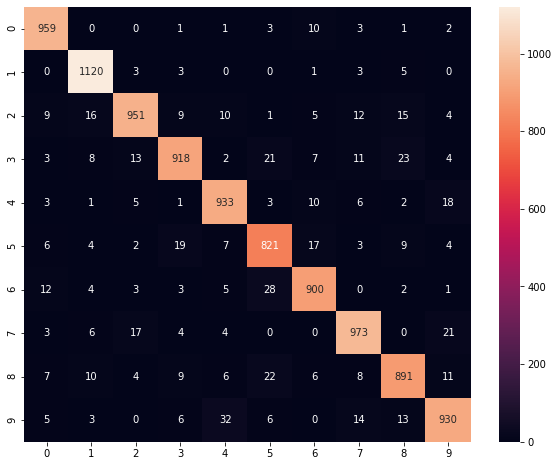

In [7]:
(time_DO_BN, bestModel_DO_BN) = repeatedTrainingAndTesting(model_name = "smr_DO_BN", dropout = True, batch_normalization = True, M=m)
(top_f1_DO_BN, top_accuracy_DO_BN) = evaluate(bestModel_DO_BN, 'outputs/SMR_heatmap_DO_BN.png')

# Without Dropout, With Batch-Normalization

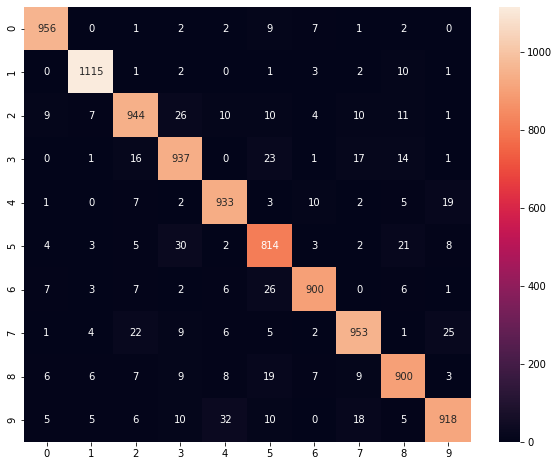

In [14]:
#(time_BN, bestModel_BN) = repeatedTrainingAndTesting(model_name = "smr_BN", dropout = False, batch_normalization = True, M=m)
(top_f1_BN, top_accuracy_BN) = evaluate(bestModel_BN, 'outputs/SMR_heatmap_BN.png')

# With Dropout, Without Batch-Normalization

_______________________________________________________________________ M=1
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6734 - accuracy: 0.4821
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8149 - accuracy: 0.7513
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6886 - accuracy: 0.7921
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6517 - accuracy: 0.8053
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6073 - accuracy: 0.8223
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5833 - accuracy: 0.8315
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5587 - accuracy: 0.8355
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5460 - accuracy: 0.8438
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5610 - accuracy: 0.8384
Epoch 

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4565 - accuracy: 0.8719
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4544 - accuracy: 0.8715
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4507 - accuracy: 0.8738
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4363 - accuracy: 0.8760
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4441 - accuracy: 0.8748
Training time: --- 30.75235629081726 seconds ---
313/313 [==============================] - 0s 892us/step - loss: 0.3923 - accuracy: 0.8872
Testing Accuracy: 88.720000%

_______________________________________________________________________ M=8
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.8709
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.8714
Epoch 3/10
1875/1875 [============================

313/313 [==============================] - 0s 921us/step - loss: 0.3565 - accuracy: 0.9016
Testing Accuracy: 90.160000%

_______________________________________________________________________ M=14
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4165 - accuracy: 0.8828
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4253 - accuracy: 0.8800
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4126 - accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4085 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4114 - accuracy: 0.8829
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4111 - accuracy: 0.8831
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4083 - accuracy: 0.8850
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4094 - acc

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4079 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3982 - accuracy: 0.8886
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4136 - accuracy: 0.8815
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4074 - accuracy: 0.8841
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4074 - accuracy: 0.8846
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4056 - accuracy: 0.8848
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3985 - accuracy: 0.8876
Training time: --- 30.63644528388977 seconds ---
313/313 [==============================] - 0s 869us/step - loss: 0.3387 - accuracy: 0.9058
Testing Accuracy: 90.579998%

_______________________________________________________________________ M=21
Epoch 1/10
1875/1875 [===========================

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4020 - accuracy: 0.8851
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3913 - accuracy: 0.8889
Training time: --- 30.298728704452515 seconds ---
313/313 [==============================] - 0s 927us/step - loss: 0.3380 - accuracy: 0.9054
Testing Accuracy: 90.539998%

_______________________________________________________________________ M=27
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3918 - accuracy: 0.8887
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4033 - accuracy: 0.8865
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3993 - accuracy: 0.8874
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4038 - accuracy: 0.8829
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4029 - accuracy: 0.8848
Epoch 6/10
1875/1875 [==========================

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8890
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3919 - accuracy: 0.8897
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3914 - accuracy: 0.8913
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.89 - 3s 2ms/step - loss: 0.3869 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3917 - accuracy: 0.8886
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4016 - accuracy: 0.8860
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3938 - accuracy: 0.8869
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4027 - accuracy: 0.8849
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4016 - accuracy: 0.8861
Training time: --- 30.176491498947144 seconds ---


Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3885 - accuracy: 0.8876
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3880 - accuracy: 0.8888
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3887 - accuracy: 0.8871
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3989 - accuracy: 0.8844
Training time: --- 30.038892030715942 seconds ---
313/313 [==============================] - 0s 995us/step - loss: 0.3313 - accuracy: 0.9068
Testing Accuracy: 90.679997%

_______________________________________________________________________ M=40
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3872 - accuracy: 0.8868: 0s - loss:
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3916 - accuracy: 0.8855
Epoch 4/10
1875/1875 [===

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3882 - accuracy: 0.8903
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3918 - accuracy: 0.8881
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3887 - accuracy: 0.8892
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3975 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3963 - accuracy: 0.8862: 0s - l
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3951 - accuracy: 0.8847
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3896 - accuracy: 0.8868
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3824 - accuracy: 0.8914
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3873 - accuracy: 0.8909
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - los

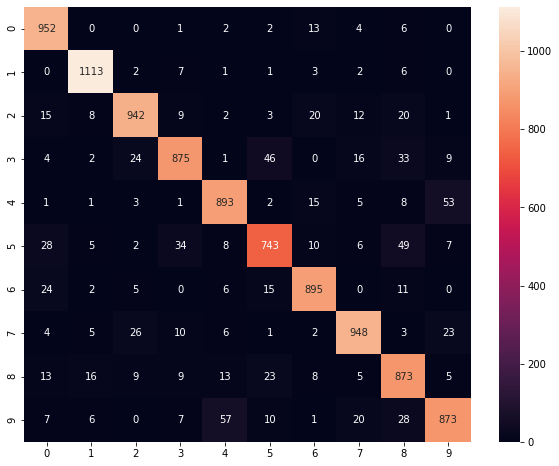

In [9]:
(time_DO, bestModel_DO) = repeatedTrainingAndTesting(model_name = "smr_DO", dropout = True, batch_normalization = False, M=m)
(top_f1_DO, top_accuracy_DO) = evaluate(bestModel_DO, 'outputs/SMR_heatmap_DO.png')

# Without Dropout, Without Batch-Normalization

_______________________________________________________________________ M=1
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6931 - accuracy: 0.4834
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7457 - accuracy: 0.7903
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6219 - accuracy: 0.8178
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5856 - accuracy: 0.8219
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5536 - accuracy: 0.8230
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5371 - accuracy: 0.8377
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5150 - accuracy: 0.8426
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5089 - accuracy: 0.8420
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5257 - accuracy: 0.8337
Epoch 

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3952 - accuracy: 0.8831
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3873 - accuracy: 0.8871
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8907
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8898
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8893
Training time: --- 21.15573000907898 seconds ---
313/313 [==============================] - 0s 914us/step - loss: 0.4100 - accuracy: 0.8806
Testing Accuracy: 88.059998%

_______________________________________________________________________ M=8
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3860 - accuracy: 0.8891
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3822 - accuracy: 0.8874
Epoch 3/10
1875/1875 [============================

313/313 [==============================] - 0s 965us/step - loss: 0.3776 - accuracy: 0.8919
Testing Accuracy: 89.190000%

_______________________________________________________________________ M=14
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3599 - accuracy: 0.8941
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3697 - accuracy: 0.8931
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3731 - accuracy: 0.8935
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3623 - accuracy: 0.8976
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3667 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3680 - accuracy: 0.8940
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3717 - accuracy: 0.8932
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3623 - acc

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3498 - accuracy: 0.8992
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3487 - accuracy: 0.9010
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3545 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3493 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3469 - accuracy: 0.8993
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3481 - accuracy: 0.9013
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3438 - accuracy: 0.9026
Training time: --- 20.93648338317871 seconds ---
313/313 [==============================] - 0s 969us/step - loss: 0.3621 - accuracy: 0.8941
Testing Accuracy: 89.410001%

_______________________________________________________________________ M=21
Epoch 1/10
1875/1875 [===========================

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3420 - accuracy: 0.9026
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3482 - accuracy: 0.8961
Training time: --- 20.980831623077393 seconds ---
313/313 [==============================] - 0s 924us/step - loss: 0.3656 - accuracy: 0.8974
Testing Accuracy: 89.740002%

_______________________________________________________________________ M=27
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3476 - accuracy: 0.8992
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3522 - accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3592 - accuracy: 0.8942
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3411 - accuracy: 0.8990
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3391 - accuracy: 0.9009
Epoch 6/10
1875/1875 [==========================

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3382 - accuracy: 0.9009
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3350 - accuracy: 0.9033
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3365 - accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.9031
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3438 - accuracy: 0.9018
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3417 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3383 - accuracy: 0.9046
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3277 - accuracy: 0.9060
Training time: --- 20.84955596923828 seconds ---
313/313 [==============================] - 

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3301 - accuracy: 0.9068
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3335 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3307 - accuracy: 0.9053
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3325 - accuracy: 0.9023
Training time: --- 21.161275148391724 seconds ---
313/313 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.9015
Testing Accuracy: 90.149999%

_______________________________________________________________________ M=40
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3324 - accuracy: 0.9047
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3334 - accuracy: 0.9046
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3313 - accuracy: 0.9045
Epoch 4/10
1875/1875 [============================

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3282 - accuracy: 0.9034
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3233 - accuracy: 0.9077
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3216 - accuracy: 0.9084
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3284 - accuracy: 0.9039
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3318 - accuracy: 0.9017
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3282 - accuracy: 0.9026
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3334 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3279 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3286 - accuracy: 0.9030
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.331

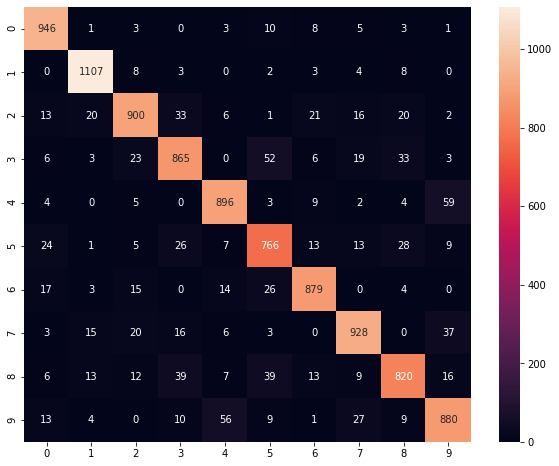

In [10]:
(time_none, bestModel_none) = repeatedTrainingAndTesting(model_name = "SMR_none", dropout = False, batch_normalization = False, M=m)
(top_f1_none, top_accuracy_none) = evaluate(bestModel_none, 'outputs/SMR_heatmap_none.png')

# Save Results

In [15]:
data = {'Accuracy_DO_BN': top_accuracy_DO_BN, 'Time_DO_BN': time_DO_BN,'F1_DO_BN': top_f1_DO_BN,
        'Accuracy_BN' : top_accuracy_BN, 'Time_BN' : time_BN, 'F1_BN': top_f1_BN,
        'Accuracy_DO' : top_accuracy_DO, 'Time_DO': time_DO, 'F1_DO': top_f1_DO, 
        'Accuracy_NONE': top_accuracy_none, 'Time_NONE': time_none, 'F1_NONE' : top_f1_none}

df = pd.DataFrame(data,index=[0])

df.to_csv('outputs/SMR.csv')